### Import the Packages

In [7]:
import pandas as pd 
import numpy as np
#import matplotlib.pyplot as plt 
#import seaborn as sns
#sns.set()

### Importing the Data

In [30]:
raw_csv_data = pd.read_csv("/content/drive/My Drive/Serietiempo/densidad.csv", index_col='Fecha',parse_dates=True)

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
df_comp = raw_csv_data.copy()

### Examining the Data

In [32]:
df_comp.head()

,Prom,Varianza,Desvest,N,ETM
Fecha,,,,,
1996-04-20,3.142210,0.535013,0.731446,2,0.517210
1996-05-30,2.781250,0.236328,0.486136,2,0.343750
1996-06-29,2.937500,0.125000,0.353553,2,0.250000
1996-08-14,3.462798,6.303363,2.510650,2,1.775298
1996-08-30,16.265625,377.266113,19.423339,2,13.734375


In [33]:
df_comp

,Prom,Varianza,Desvest,N,ETM
Fecha,,,,,
1996-04-20,3.142210,0.535013,0.731446,2,0.517210
1996-05-30,2.781250,0.236328,0.486136,2,0.343750
1996-06-29,2.937500,0.125000,0.353553,2,0.250000
1996-08-14,3.462798,6.303363,2.510650,2,1.775298
1996-08-30,16.265625,377.266113,19.423339,2,13.734375
...,...,...,...,...,...
2007-01-19,61.833333,311.766667,17.656916,6,7.208406
2007-02-16,46.666667,395.866667,19.896398,6,8.122671
2007-03-19,59.666667,1017.866667,31.904023,6,13.024763


In [34]:
df_comp.describe()

,Prom,Varianza,Desvest,N,ETM
count,110.000000,110.000000,110.000000,110.000000,110.000000
mean,25.546142,295.059822,13.826744,4.945455,6.461186
std,20.274300,385.693448,10.238848,1.669128,5.436872
min,0.000000,0.000000,0.000000,1.000000,0.000000
25%,9.988281,32.630495,5.711673,4.250000,2.512915
50%,21.916667,166.416667,12.900257,6.000000,5.558995
75%,37.708333,396.466667,19.911469,6.000000,8.178192
max,88.000000,2295.333333,47.909637,6.000000,31.088941


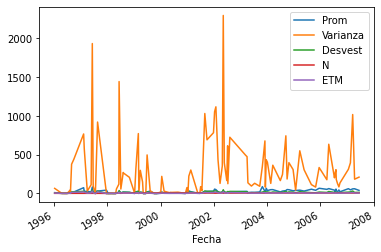

In [44]:
df_comp.plot();

In [45]:
df_comp.isna()

,Prom,Varianza,Desvest,N,ETM
Fecha,,,,,
1996-04-20,False,False,False,False,False
1996-05-30,False,False,False,False,False
1996-06-29,False,False,False,False,False
1996-08-14,False,False,False,False,False
1996-08-30,False,False,False,False,False
...,...,...,...,...,...
2007-01-19,False,False,False,False,False
2007-02-16,False,False,False,False,False
2007-03-19,False,False,False,False,False


In [46]:
df_comp.isna().sum()

Prom        0
Varianza    0
Desvest     0
N           0
ETM         0
dtype: int64

In [47]:
df_comp.Prom.isna().sum()

0

### Plotting the Data

In [38]:
import matplotlib.pyplot as plt

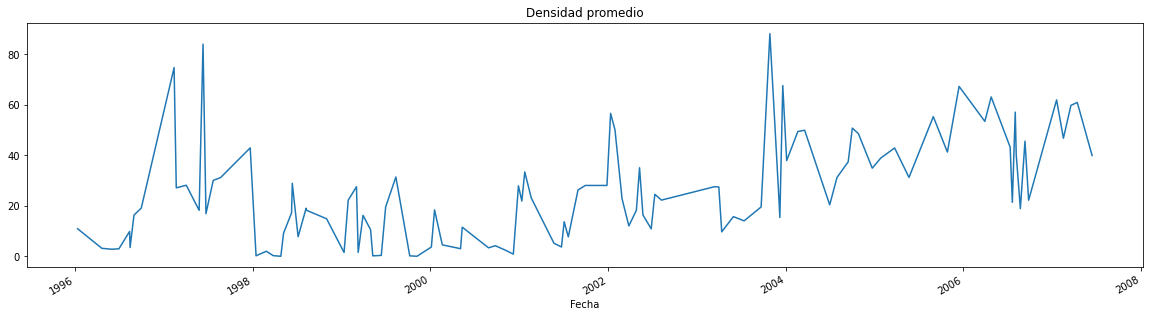

In [51]:
df_comp.Prom.plot(figsize=(20,5), title = "Densidad promedio")
plt.show()

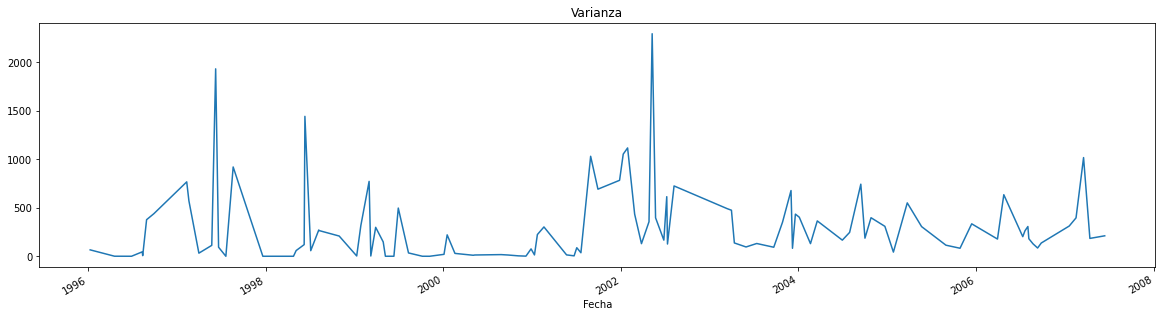

In [50]:
df_comp.Varianza.plot(figsize=(20,5), title = "Varianza")
plt.show()

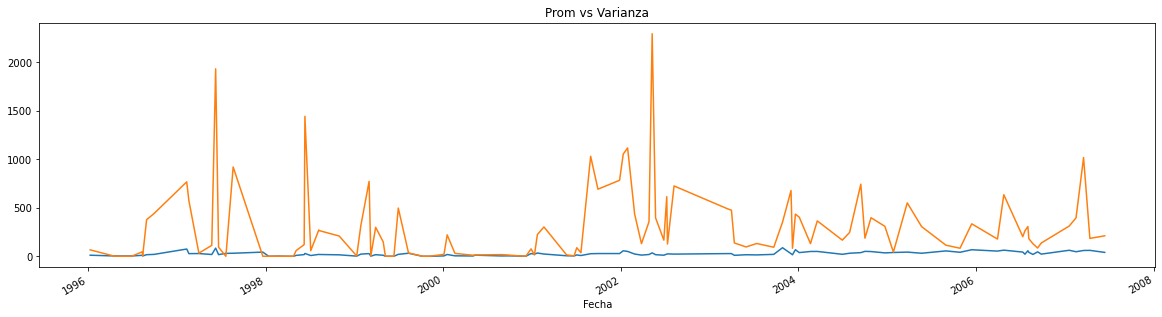

In [41]:
df_comp.Prom.plot(figsize=(20,5), title = "Densidad promedio")
df_comp.Varianza.plot(figsize=(20,5), title = "Varianza")
plt.title("Prom vs Varianza")
plt.show()

### The QQ Plot

In [42]:
import scipy.stats


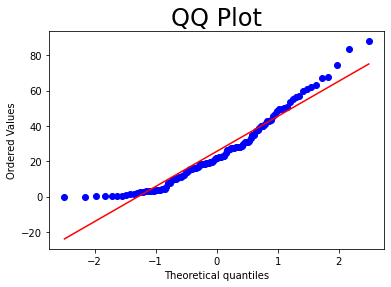

In [43]:
scipy.stats.probplot(df_comp.Prom, plot =  plt)
plt.title("QQ Plot", size = 24)
plt.show()

No se ajustan a una distribución normal

Transformamos de texto a fecha, dayfirst = True esto es para indicar que primero está el día y luego mes en mi data

In [19]:
df_comp.date = pd.to_datetime(df_comp.Fecha, dayfirst = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [20]:
df_comp.head()

,Fecha,Prom,Varianza,Desvest,N,ETM
0,20/04/1996,3.142210,0.535013,0.731446,2,0.517210
1,30/05/1996,2.781250,0.236328,0.486136,2,0.343750
2,29/06/1996,2.937500,0.125000,0.353553,2,0.250000
3,14/08/1996,3.462798,6.303363,2.510650,2,1.775298
4,30/08/1996,16.265625,377.266113,19.423339,2,13.734375


In [21]:
df_comp.date.describe()

count                     110
unique                    110
top       2006-03-30 00:00:00
freq                        1
first     1996-04-20 00:00:00
last      2007-06-14 00:00:00
Name: Fecha, dtype: object

Poniendo fecha como un indice

In [23]:
df_comp.set_index("Fecha", inplace=True)

In [24]:
df_comp.head()

,Prom,Varianza,Desvest,N,ETM
Fecha,,,,,
20/04/1996,3.142210,0.535013,0.731446,2,0.517210
30/05/1996,2.781250,0.236328,0.486136,2,0.343750
29/06/1996,2.937500,0.125000,0.353553,2,0.250000
14/08/1996,3.462798,6.303363,2.510650,2,1.775298
30/08/1996,16.265625,377.266113,19.423339,2,13.734375


Convertirlo a una serie de tiempo

In [25]:
df_comp=df_comp.asfreq('m')

In [26]:
df_comp.head()

,Prom,Varianza,Desvest,N,ETM
Fecha,,,,,
1996-04-30,NaN,NaN,NaN,NaN,NaN
1996-05-31,NaN,NaN,NaN,NaN,NaN
1996-06-30,NaN,NaN,NaN,NaN,NaN
1996-07-31,NaN,NaN,NaN,NaN,NaN
1996-08-31,NaN,NaN,NaN,NaN,NaN


In [27]:
df_comp

,Prom,Varianza,Desvest,N,ETM
Fecha,,,,,
1996-04-30,NaN,NaN,NaN,NaN,NaN
1996-05-31,NaN,NaN,NaN,NaN,NaN
1996-06-30,NaN,NaN,NaN,NaN,NaN
1996-07-31,NaN,NaN,NaN,NaN,NaN
1996-08-31,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2007-01-31,NaN,NaN,NaN,NaN,NaN
2007-02-28,NaN,NaN,NaN,NaN,NaN
2007-03-31,NaN,NaN,NaN,NaN,NaN


In [48]:
df_comp


,Prom,Varianza,Desvest,N,ETM
Fecha,,,,,
1996-04-20,3.142210,0.535013,0.731446,2,0.517210
1996-05-30,2.781250,0.236328,0.486136,2,0.343750
1996-06-29,2.937500,0.125000,0.353553,2,0.250000
1996-08-14,3.462798,6.303363,2.510650,2,1.775298
1996-08-30,16.265625,377.266113,19.423339,2,13.734375
...,...,...,...,...,...
2007-01-19,61.833333,311.766667,17.656916,6,7.208406
2007-02-16,46.666667,395.866667,19.896398,6,8.122671
2007-03-19,59.666667,1017.866667,31.904023,6,13.024763
